#### 以均匀介质为例，探究震源附近网格加密对走时场准确性的作用 【谨慎使用】

In [1]:
import pyfmm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 粗网格
xarr = np.arange(0, 100, 4)
yarr = np.arange(0, 50, 4)
zarr = np.array([0.0])  # 二维情况

# 慢度场
slw  = np.ones((len(xarr), len(yarr), len(zarr)), dtype='f')

srcloc = [10, 20, 0.0]

# FMM解
TT = pyfmm.travel_time_source(
    srcloc,
    xarr, yarr, zarr, slw)

# FMM解，震源附近网格加密【注意这里给了比较夸张的参数】
TT_refined = pyfmm.travel_time_source(
    srcloc,
    xarr, yarr, zarr, slw, rfgfac=40, rfgn=15)

# 真实解
xx, yy, zz = srcloc
real_TT = np.sqrt(((xarr-xx)**2)[:,None,None] + ((yarr-yy)**2)[None,:,None] + ((zarr-zz)**2)[None,None,:])

In [3]:
diff1 = np.mean((TT - real_TT)**2)
diff2 = np.mean((TT_refined - real_TT)**2)
print(f"震源附近网格加密前，走时误差 {diff1:.5f} s")
print(f"震源附近网格加密后，走时误差 {diff2:.5f} s")

震源附近网格加密前，走时误差 0.33582 s
震源附近网格加密后，走时误差 1.16125 s


下方绘图发现，红线比蓝线更接近黑线，似乎表明震源网格加密的效果很好。但更多的测试发现，该方法在全局网格稍微加密后就基本无优势了，甚至会起到一点反效果。震源附近的波前面曲率过大基本是精度缺失的主要原因，有条件的话建议加密全局网格（计算速度下降），而这种加密震源附近网格的方法慎用。

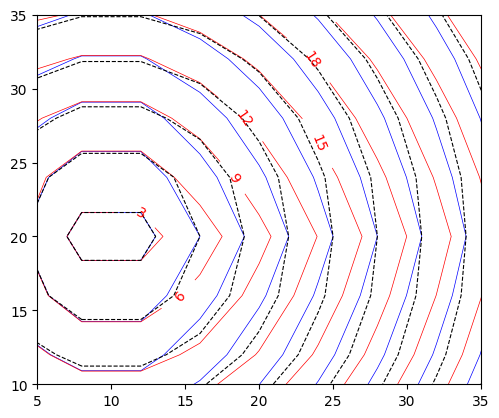

In [4]:
fig, ax = plt.subplots(1, 1)
_ = ax.contour(xarr, yarr, TT[:, :, 0].T, levels=30, linewidths=0.5, colors='b')
cs = ax.contour(xarr, yarr, TT_refined[:, :, 0].T, levels=30, linewidths=0.5, colors='r')
_  = ax.contour(xarr, yarr, real_TT[:, :, 0].T, levels=30, linewidths=0.8, colors='k', linestyles='--')
ax.clabel(cs)

ax.set_xlim([5, 35])
ax.set_ylim([10, 35])
ax.set_aspect('equal')